In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2022-06-26 18:28:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.1.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   330MB/s    in 1.5s    

2022-06-26 18:28:13 (330 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [2]:
from zipfile import ZipFile
zipped = ZipFile("10_food_classes_all_data.zip")
zipped.extractall()
zipped.close()

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
import os
for path, dirs, files in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirs)} directories and {len(files)} files in {path}")

There are 2 directories and 0 files in 10_food_classes_all_data
There are 10 directories and 0 files in 10_food_classes_all_data/test
There are 0 directories and 250 files in 10_food_classes_all_data/test/steak
There are 0 directories and 250 files in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 files in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 files in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 files in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 files in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 files in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 files in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 files in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 files in 10_food_classes_all_data/test/hamburger
There are 10 directories and 0 files in 10_food_classes_al

In [5]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [6]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [7]:
import random
def view_random_image(dir, target_class):
  folder = dir + "/" + target_class
  random_image = random.choice(os.listdir(folder))
  img = mpimg.imread(folder + "/" + random_image)
  print(img.shape)

  plt.title(target_class)
  plt.imshow(img)
  plt.axis(False)

(512, 512, 3)


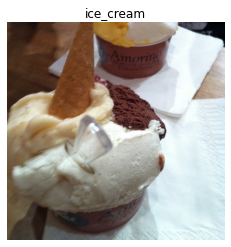

In [8]:
view_random_image(train_dir, "ice_cream")

In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255.,
                             rotation_range=0.2,
                             shear_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

In [10]:
train_data = datagen.flow_from_directory(train_dir,
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode="categorical")

test_data = datagen.flow_from_directory(test_dir,
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [14]:
EPOCHS = 5
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=(3, 3),
                         activation="relu",
                         padding="valid",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=EPOCHS,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 132s 561ms/step - loss: 2.1651 - accuracy: 0.2096 - val_loss: 2.1556 - val_accuracy: 0.2244
Epoch 2/5
235/235 [==============================] - 131s 559ms/step - loss: 2.0631 - accuracy: 0.2683 - val_loss: 2.0175 - val_accuracy: 0.2964
Epoch 3/5
235/235 [==============================] - 131s 557ms/step - loss: 2.0196 - accuracy: 0.2824 - val_loss: 1.9952 - val_accuracy: 0.2852
Epoch 4/5
235/235 [==============================] - 130s 552ms/step - loss: 1.9879 - accuracy: 0.2988 - val_loss: 1.9241 - val_accuracy: 0.3332
Epoch 5/5
235/235 [==============================] - 131s 558ms/step - loss: 1.9497 - accuracy: 0.3244 - val_loss: 1.8947 - val_accuracy: 0.3408


In [15]:
def plot_history_curve(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  epochs = np.arange(0, len(loss))
  plt.figure(figsize=(20, 7))
  plt.subplot(1, 2, 1)
  plt.title("EPOCHS - LOSS")
  plt.plot(epochs, loss)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.subplot(1, 2, 2)
  plt.title("EPOCHS - ACCURACY")
  plt.plot(epochs, accuracy)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()

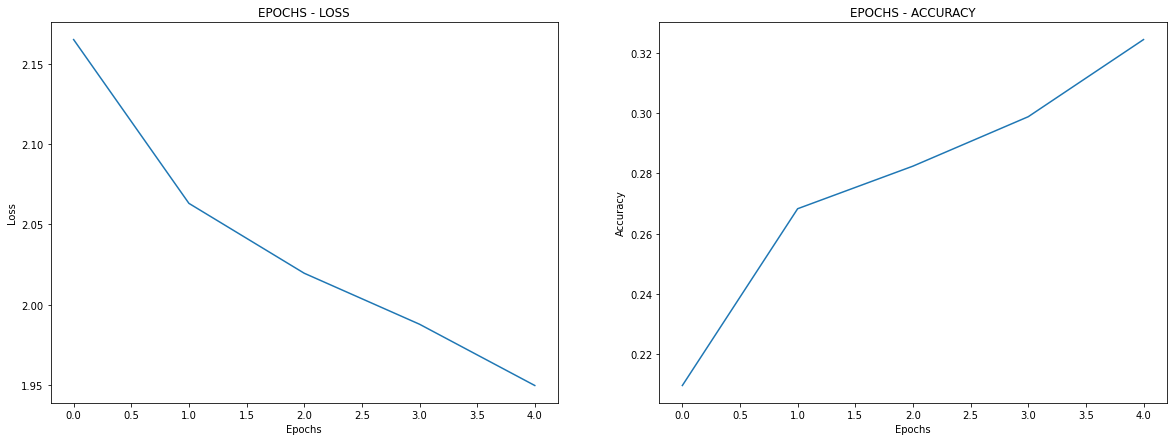

In [16]:
plot_history_curve(history_1)

In [17]:
model_1.evaluate(test_data)

79/79 [==============================] - 33s 420ms/step - loss: 1.9151 - accuracy: 0.3384


[1.9150540828704834, 0.3384000062942505]

In [18]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [19]:
datagen_2 = ImageDataGenerator(rescale=1/255.)
train_data_2 = datagen_2.flow_from_directory(train_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="categorical")

test_data_2 = datagen_2.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [20]:
EPOCHS = 5
model_2 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=(3, 3),
                         activation="relu",
                         padding="valid",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data_2,
                        epochs=EPOCHS,
                        steps_per_epoch=len(train_data_2),
                        validation_data=test_data,
                        validation_steps=len(test_data_2))

Epoch 1/5
235/235 [==============================] - 77s 327ms/step - loss: 2.1716 - accuracy: 0.1983 - val_loss: 2.1112 - val_accuracy: 0.2236
Epoch 2/5
235/235 [==============================] - 67s 285ms/step - loss: 2.0159 - accuracy: 0.2881 - val_loss: 2.0986 - val_accuracy: 0.2412
Epoch 3/5
235/235 [==============================] - 66s 282ms/step - loss: 1.8297 - accuracy: 0.3700 - val_loss: 2.1045 - val_accuracy: 0.2536
Epoch 4/5
235/235 [==============================] - 65s 278ms/step - loss: 1.4627 - accuracy: 0.5089 - val_loss: 2.2371 - val_accuracy: 0.2400
Epoch 5/5
235/235 [==============================] - 66s 280ms/step - loss: 0.9135 - accuracy: 0.7019 - val_loss: 2.6891 - val_accuracy: 0.2300


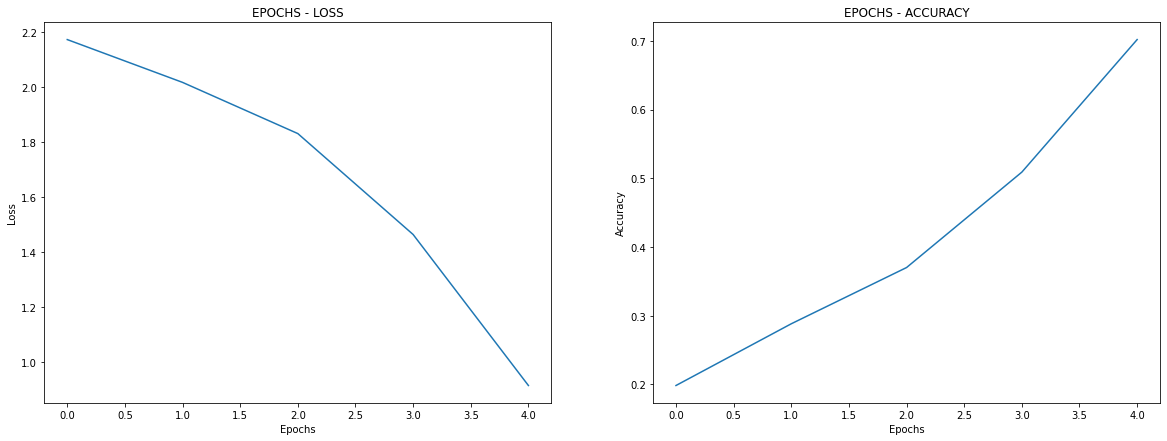

In [23]:
plot_history_curve(history_2)

In [24]:
model_2.evaluate(test_data_2)

79/79 [==============================] - 13s 162ms/step - loss: 2.7331 - accuracy: 0.2716


[2.733060836791992, 0.27160000801086426]

In [25]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [34]:
def setup_image(filename, image_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [image_shape, image_shape])
  img /= 255.
  return img

In [35]:
def pred_and_plot(model, filename, class_names):
  img = setup_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]
    
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [30]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-06-26 19:03:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-06-26 19:03:34 (217 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

--2022-06-26 19:03:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

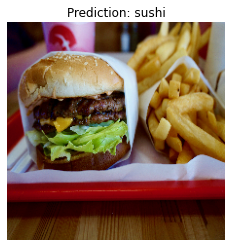

In [41]:
pred_and_plot(model_2, "03-hamburger.jpeg", class_names)

In [38]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')